<a href="https://colab.research.google.com/github/SasiwimonV/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Normalization-Standardization  https://scikit-learn.org/stable/modules/preprocessing.html?fbclid=IwAR04wbkCtriEcdptir7rNvepL9xRGseDXxBiVZ07_iFLqc-5mwjeXqgJ4Po

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##ใช้ data กรมอุตุ

In [12]:
weather_data=pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/Group4_ณัฐกรณ์_ภัทราวดี_ศศิวิมล_สุจิรา.xlsx')

In [13]:
weather_data.shape

(8169, 13)

In [14]:
data_features = weather_data.iloc[:,4:-1]
data_features.head()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณฝน,ปริมาณเมฆ
0,3.0,1005.47,27.6,9.0,24.2,83,1.4,9.0
1,2.0,1006.65,25.6,10.0,24.0,92,17.7,10.0
2,3.0,1007.49,25.6,10.0,22.9,86,3,10.0
3,2.0,1008.28,25.8,8.0,21.9,80,0,8.0
4,2.0,1009.88,24.3,10.0,21.7,86,2.2,10.0


In [15]:
data_features.dtypes

ความเร็วลม            float64
ความกด                float64
อุณหภูมิตุ้ม          float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิจุดต่ำสุด     float64
ความชื้น                int64
ปริมาณฝน               object
ปริมาณเมฆ             float64
dtype: object

In [26]:
data_features.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณเมฆ
count,8113.000000,8169.000000,8169.000000,7838.000000,8169.000000,8169.000000,7838.000000
mean,2.322569,1013.111413,24.755013,3.299566,17.915204,69.305178,3.299566
std,1.311215,3.242448,2.843517,2.367818,3.819495,9.028821,2.367818
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000
25%,1.000000,1011.040000,23.100000,1.000000,15.500000,63.000000,1.000000
50%,2.000000,1012.890000,25.200000,3.000000,18.200000,69.000000,3.000000
75%,3.000000,1015.120000,26.900000,5.000000,20.800000,74.000000,5.000000
max,11.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,10.000000


In [25]:
data_features[data_features['ปริมาณฝน'].eq('-')]

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณฝน,ปริมาณเมฆ
305,4.0,1009.88,27.9,4.0,23.5,78,-,4.0
306,2.0,1009.47,27.5,2.0,21.9,73,-,2.0
307,3.0,1008.08,27.3,3.0,20.7,69,-,3.0
308,5.0,1008.35,27.1,5.0,21.3,72,-,5.0
309,2.0,1009.30,27.0,2.0,21.3,72,-,2.0
...,...,...,...,...,...,...,...,...
7804,5.0,1015.18,23.2,9.0,17.9,82,-,9.0
7805,6.0,1017.40,23.0,9.0,16.7,73,-,9.0
7806,3.0,1019.01,22.0,5.0,14.8,72,-,5.0
8109,6.0,1018.01,20.3,3.0,10.7,64,-,3.0


In [40]:
data_features_d =data_features[data_features.eq('-').any(1)==False] #ลบค่าที่มี -
data_features_d .shape

(5988, 8)

In [41]:
data_features_d =data_features_d[data_features_d.eq('T').any(1)==False]
data_features_d.shape

(5778, 8)

#แปลงให้เป็นตัวเลข

In [42]:
data_features_d['ความเร็วลม']= data_features['ความเร็วลม'].astype(float)
data_features_d['ปริมาณเมฆ']= data_features['ปริมาณเมฆ'].astype(float)
data_features_d['ความกด']= data_features['ความกด'].astype(float)
data_features_d['อุณหภูมิตุ้ม']= data_features['อุณหภูมิตุ้ม'].astype(float)
data_features_d['อุณหภูมิจุดน้ำค้าง']= data_features['อุณหภูมิจุดน้ำค้าง'].astype(float)
data_features_d['อุณหภูมิจุดต่ำสุด']= data_features['อุณหภูมิจุดต่ำสุด'].astype(float)

In [43]:
data_features_d.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณเมฆ
count,5729.000000,5778.000000,5778.000000,5558.000000,5778.000000,5778.000000,5558.000000
mean,2.253273,1012.970076,24.809934,3.323678,17.981014,69.410869,3.323678
std,1.223140,3.234548,2.790382,2.447090,3.762340,9.438618,2.447090
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000
25%,1.000000,1010.960000,23.200000,1.000000,15.600000,63.000000,1.000000
50%,2.000000,1012.765000,25.300000,3.000000,18.100000,68.000000,3.000000
75%,3.000000,1014.967500,26.900000,5.000000,20.800000,75.000000,5.000000
max,10.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,10.000000


In [45]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [9,9]

In [ ]:
pd.plotting.scatter_matrix(data_features_d);

In [47]:
from matplotlib import pyplot as plt

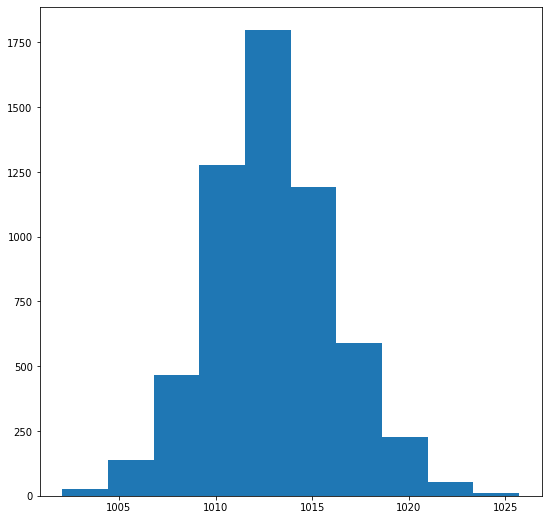

In [48]:
plt.hist(data_features_d['ความกด']);

In [49]:
from sklearn import preprocessing

##standardScaler

In [54]:
#define ตั้งค่า,ทำวิธีการอะไร
scaler = preprocessing.StandardScaler()
#train สร้าง model จาก data
scaler.fit(data_features_d)
#predict-transform นำมาใช้งาน ทำนาย data ใหม่
data_features_d_s = scaler.fit_transform(data_features_d) #สามารถรวบโค้ดได้

In [55]:
data_features_d_s

array([[ 0.61055332, -2.31894108,  0.9999731 , ...,  1.43986191,
         0.03033702,  2.31983008],
       [-0.20708576, -1.95409806,  0.2831634 , ...,  2.39347381,
         2.80187907,  2.72851547],
       [ 0.61055332, -1.69437929,  0.2831634 , ...,  1.75773255,
         0.30239022,  2.72851547],
       ...,
       [-1.02472484, -2.50754638,  0.5340468 , ..., -1.52693067,
        -0.20770954, -1.35833849],
       [-0.20708576, -2.22927627,  0.13980146, ..., -1.42097379,
        -0.20770954, -0.5409677 ],
       [ 0.61055332, -1.47176321,  0.2831634 , ..., -1.20906003,
        -0.20770954, -0.94965309]])

(array([1.080e+02, 3.620e+03, 1.167e+03, 5.440e+02, 2.040e+02, 6.000e+01,
        0.000e+00, 2.000e+01, 3.000e+00, 3.000e+00]),
 array([-1.84236392, -1.02472484, -0.20708576,  0.61055332,  1.4281924 ,
         2.24583148,  3.06347056,  3.88110964,  4.69874872,  5.5163878 ,
         6.33402688]),
 <a list of 10 Patch objects>)

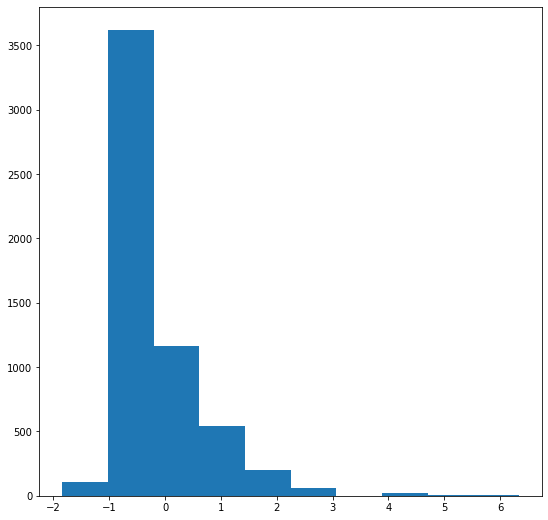

In [56]:
plt.hist(data_features_d_s[:,0])

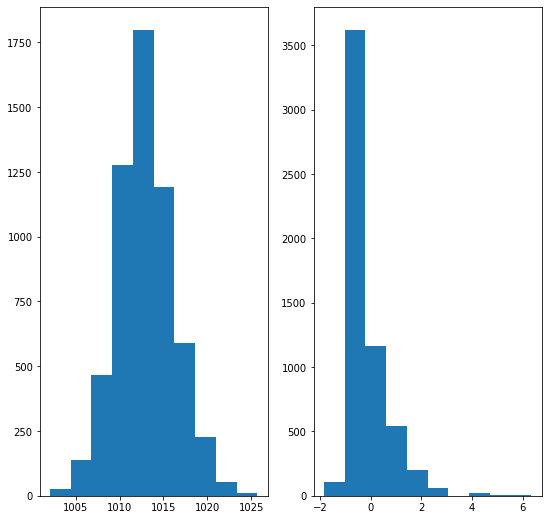

In [60]:
plt.subplot(1,2,1) #2กราฟมาอยู่ด้วยกัน
plt.hist(data_features_d['ความกด']);
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0]);

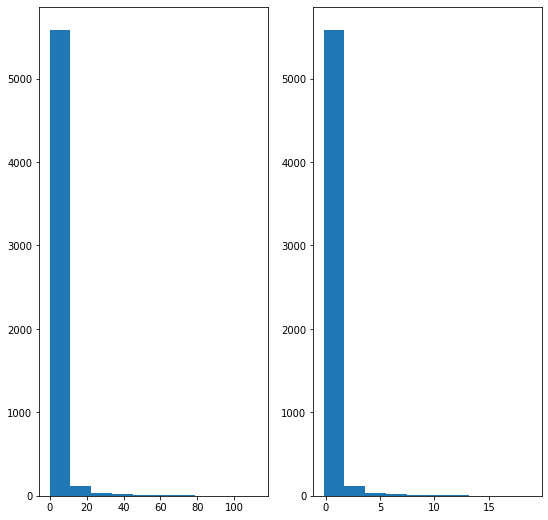

In [62]:
plt.subplot(1,2,1) #2กราฟมาอยู่ด้วยกัน
plt.hist(data_features_d['ปริมาณฝน']);
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,6]);

#Min-Max *normalization*

In [63]:
#define ตั้งค่า,ทำวิธีการอะไร
scaler = preprocessing.MinMaxScaler() 
#train สร้าง model จาก data
scaler.fit(data_features_d)
#predict-transform นำมาใช้งาน ทำนาย data ใหม่
data_features_d_norm = scaler.fit_transform(data_features_d) #สามารถรวบโค้ดได้

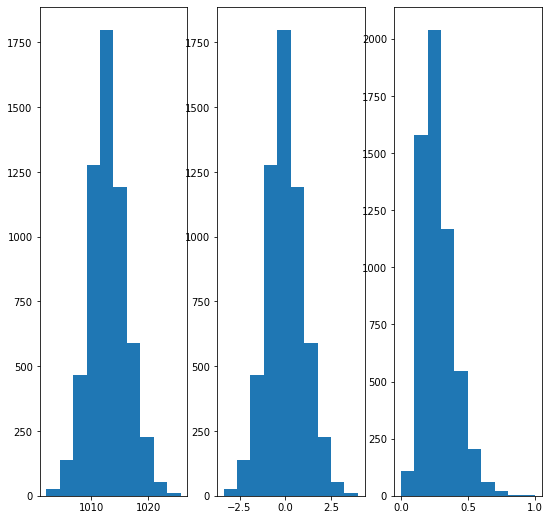

In [66]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,1]);
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]);

#discretization

In [67]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/สำเนาของ 30.ศศิวิมล วิลาชัย.csv')

In [68]:
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [69]:
home_data.shape

(100, 22)

##ลบ record ที่ค่า sell price เป็นค่าว่าง

In [70]:
home_data.dropna(subset=['sell_price'])

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,3,3,4


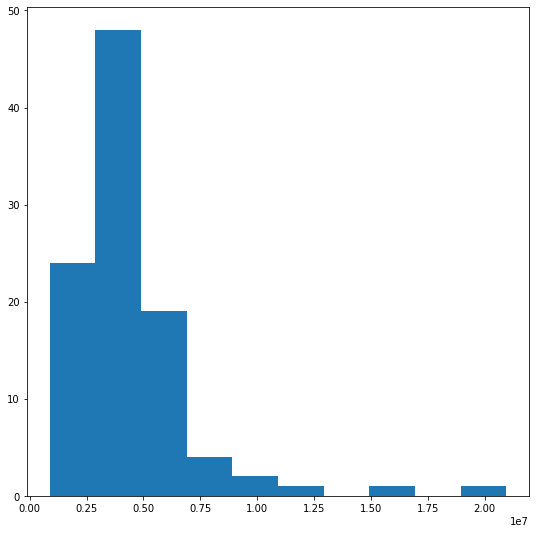

In [71]:
plt.hist(home_data['sell_price']);

###แปลงค่า sell_price 
- ราคาต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่าง 5m - 1m ให้เป็น 2
- ราคา 10m ขึ้นไป ให้เป็น 3

In [80]:
home_data[home_data['sell_price'] <5000000]= 1

In [81]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1,1,1,1,1,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1,1,1,1,1,1
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1,1,1,1,1,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1,1,1,1,1,1
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1,1,1,1,1,1


#One-hot-Encoder 
- การทำข้อมูลที่เป็น Categorical ทั้งในรูปแบบมีลำดับ (Ordinal number) และไม่มีลำดับ (Nominal number) เปลี่ยนให้อยู่ในรูปแบบของ Binary Values ที่มีค่า 0 หรือ 1 ทำให้ง่ายต่อการนำข้อมูลไปใช้ต่อยอดกับ Machine Learning

In [82]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [84]:
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,d21250-7/11,d1500-7/11,zone_1,zone_กลางเมือง-เมืองเก่า-กุดกว้าง,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,2,3,0,0,0,0,0,0,1,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,10,14,0,0,0,0,1,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,4,9,0,0,0,0,0,0,1,0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,0,0,0,0,0,0,0
